In [1]:
import numpy as np
#@save
import collections
import hashlib
import inspect
import math
import os
import random
import re
import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

d2l = sys.modules[__name__]

#@save
import numpy as np
import torch
import torchvision
from PIL import Image
from scipy.spatial import distance_matrix
from torch import nn
from torch.nn import functional as F
from torchvision import transforms

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [46, 54]


In [4]:
from torch.distributions.multinomial import Multinomial

fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([53., 47.])

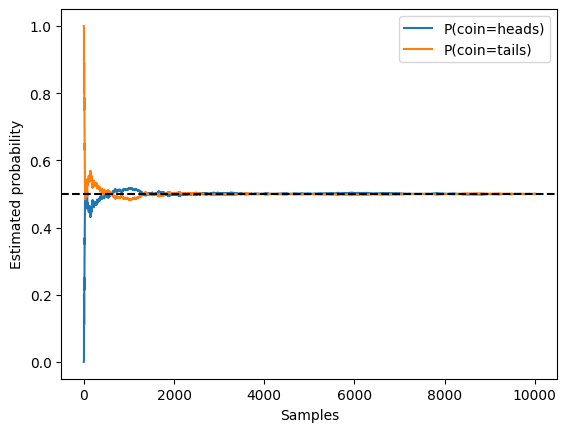

In [7]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

In [9]:
help(np.ones)

Help on function ones in module numpy:

ones(shape, dtype=None, order='C', *, like=None)
    Return a new array of given shape and type, filled with ones.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: C
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like, optional
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this argument.
    
        .. versionad

In [11]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'InverseGamma', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PositiveDefiniteTransform', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'Transform